In [1]:
from operator import attrgetter

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
from notify_run import Notify
from igraph import *

sns.set_theme(style="whitegrid")
sns.set_palette(sns.color_palette('colorblind'))

In [2]:
notify = Notify()
# notify.register()

In [132]:
#verry important
os.chdir(r"C:/Users/nieli/Documents/uva/thesis/code/")
print(os.getcwd())

C:\Users\nieli\Documents\uva\thesis\code


In [26]:
try:
    test = pickle.load(open(r"PPA/results/results-2021-05-11_12-56-09/mulambda-Ackley2Drun-0.p", "rb"))
except Exception as e:
    print(e) # you will find what is going on here

### This is for n-d functions with optimum 0, new

In [142]:
df = pd.DataFrame(columns=['run_n', 'benchmark','selection_method','best_final_objval','best_objval','theoretical_optimum','dimensions'])

directory = 'PPA/results/results-2021-05-13_17-23-26/'
i = 0
for filename in os.listdir(directory):
    i+=1
    if i%500 == 0:
        i = 0
        print(f'total of another 500 files read')
    file = pickle.load(open(directory+filename,"rb"))

    
    df = df.append({
        'run_n':file.run_n,
        'benchmark':file.benchmark_name, 
        'selection_method':file.survivor_selection_name,
        'best_final_objval': min(individual.objective_value for individual in file.parent_population), #this is the best object value at the end of the run
        'best_objval': file.best_objval_during_run.objective_value,   #this is the best obj value recorded during the run
        'theoretical_optimum': file.benchmark_optimum,
        'dimensions': file.benchmark_dimensions,
        'diplay_name': f"{file.benchmark_name}-{file.benchmark_dimensions:03d}D"
    }, ignore_index=True)
df.loc[df['selection_method'] == 'single_elitist_tournament','selection_method'] = 'el_tournament'
df.loc[df['selection_method'] == 'mupluslambda','selection_method'] = 'original'
df['error'] = abs(df['best_objval'] - df['theoretical_optimum'])
# df['benchmark'] = df.benchmark.str.replace("20", "d").str.replace("100", "f").str.replace("2", "a").str.replace("50", "e").str.replace("5", "b").str.replace("10", "c")

df = df.sort_values(by="benchmark")
df = df.astype({'theoretical_optimum':float,'error':float})
notify.send('Done reading all files')

total of another 500 files read
total of another 500 files read
total of another 500 files read
total of another 500 files read
total of another 500 files read
total of another 500 files read
total of another 500 files read
total of another 500 files read


In [143]:
df_2d = df[~df['benchmark'].isin(['Ackley', 'Rosenbrock', 'Griewank', 'Rastrigrin', 'Schwefel', 'Ellipse', 'Cigar', 'Tablet',
                    'Sphere'])]
df_nd = df[df['benchmark'].isin(['Ackley', 'Rosenbrock', 'Griewank', 'Rastrigrin', 'Schwefel', 'Ellipse', 'Cigar', 'Tablet',
                    'Sphere'])]
df_2d = df_2d.sort_values(by=['benchmark','dimensions']).reset_index()
df_nd = df_nd.sort_values(by=['benchmark','dimensions']).reset_index()

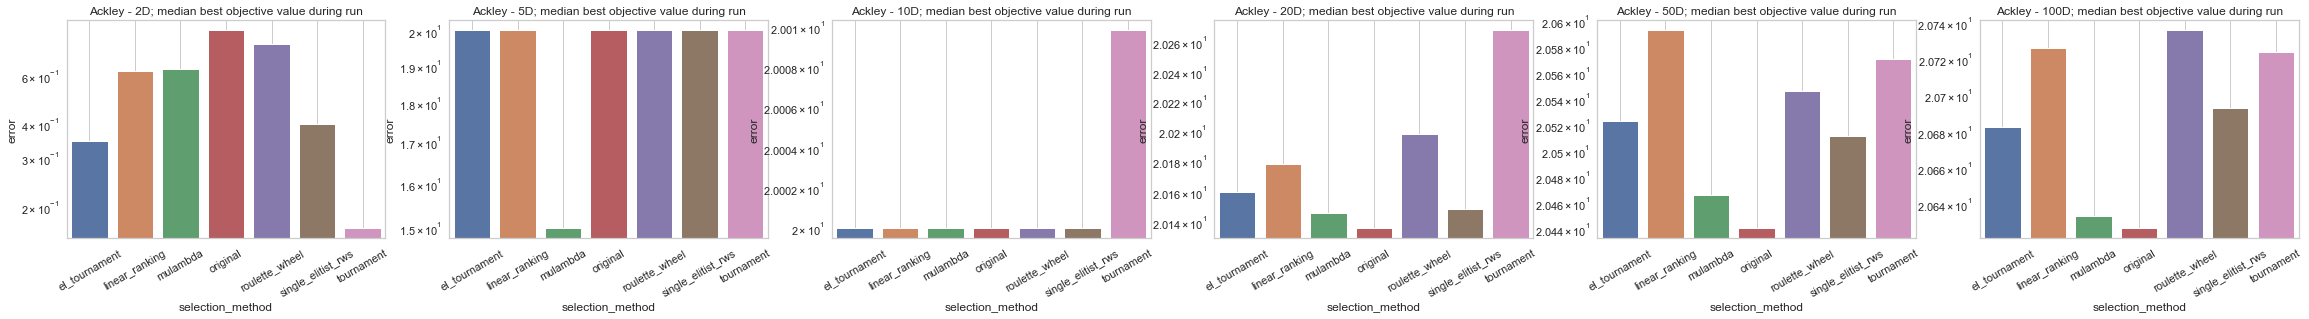

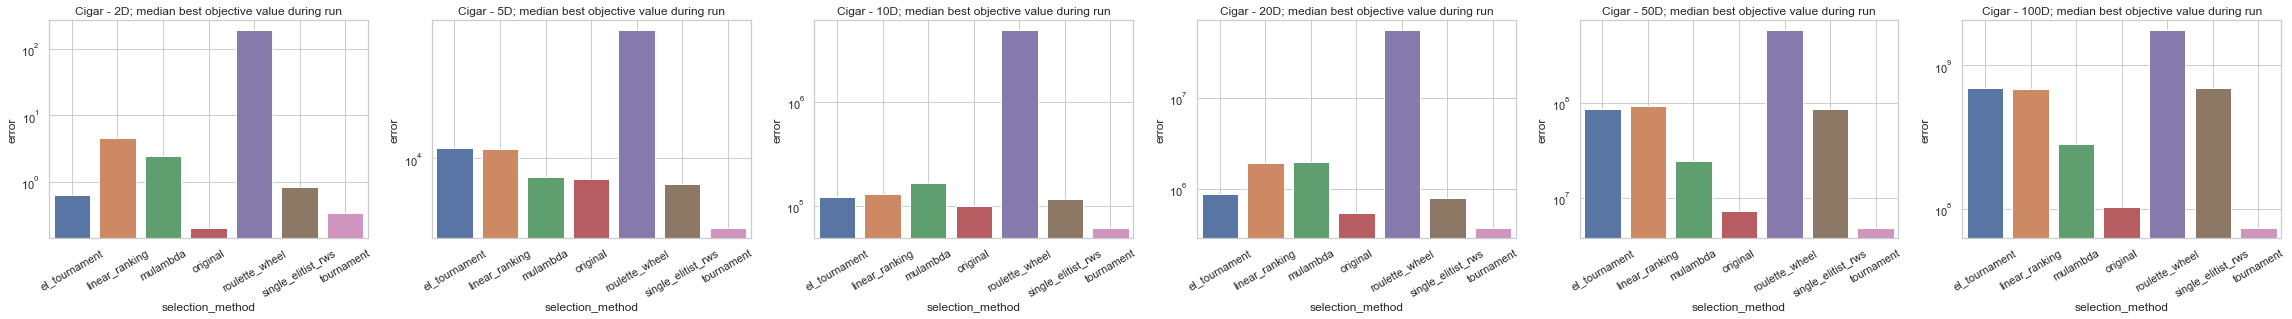

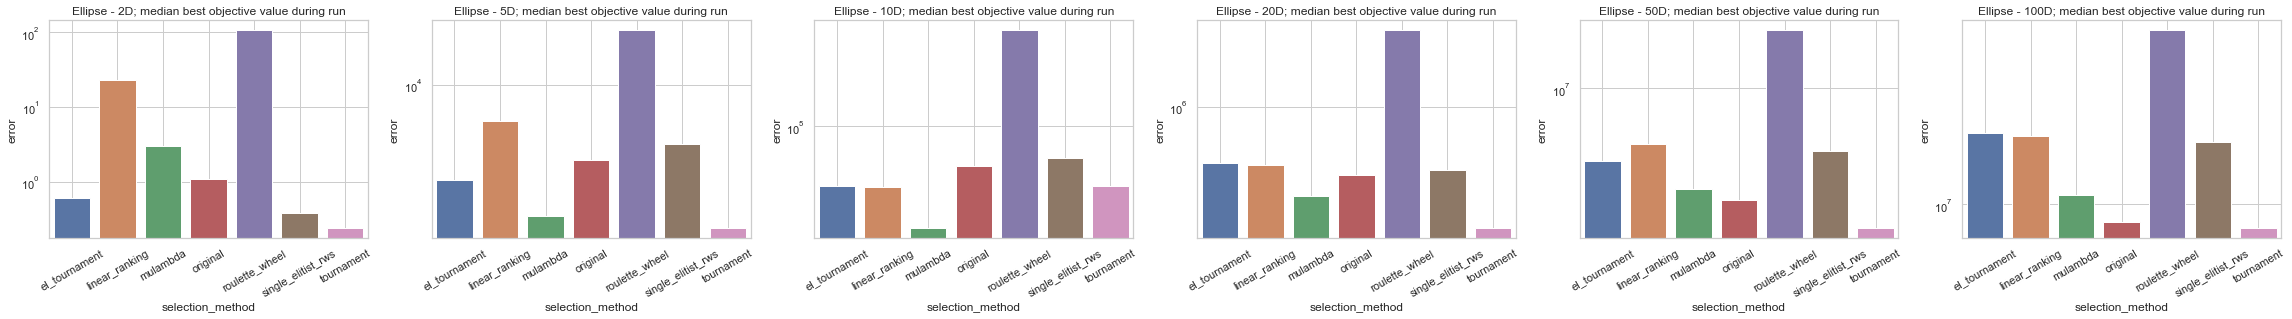

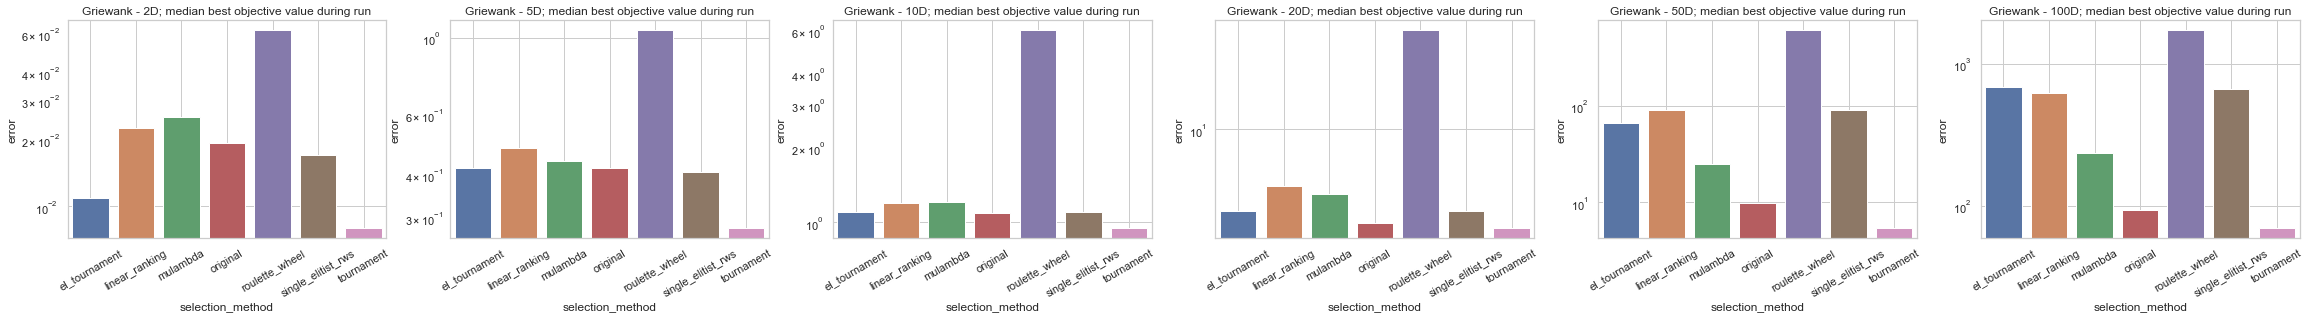

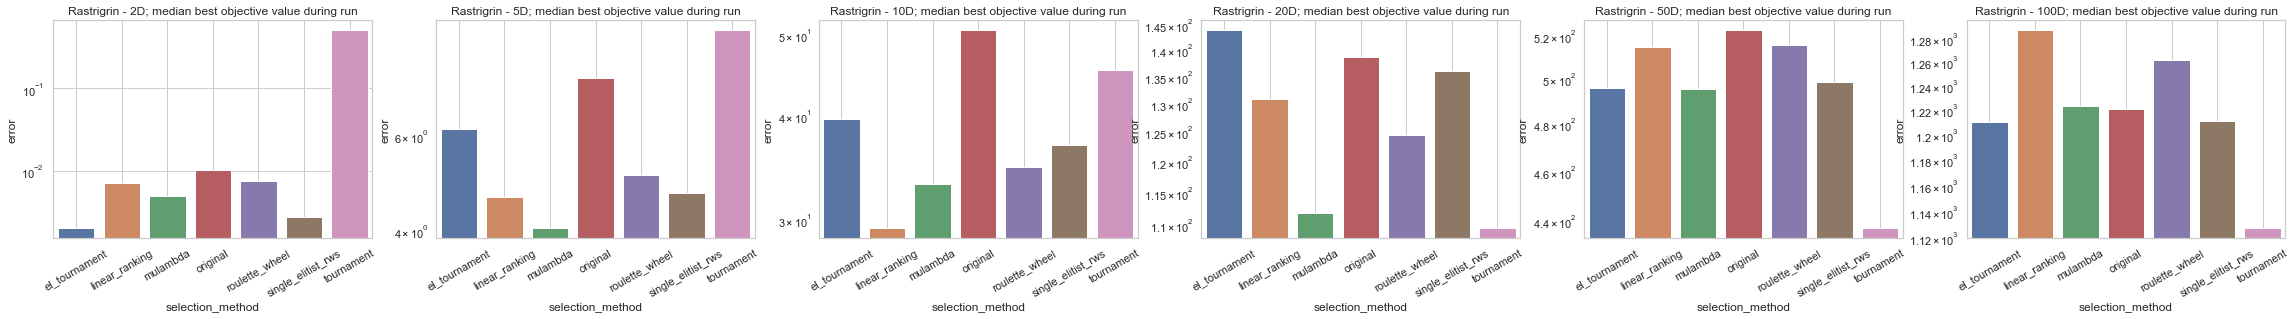

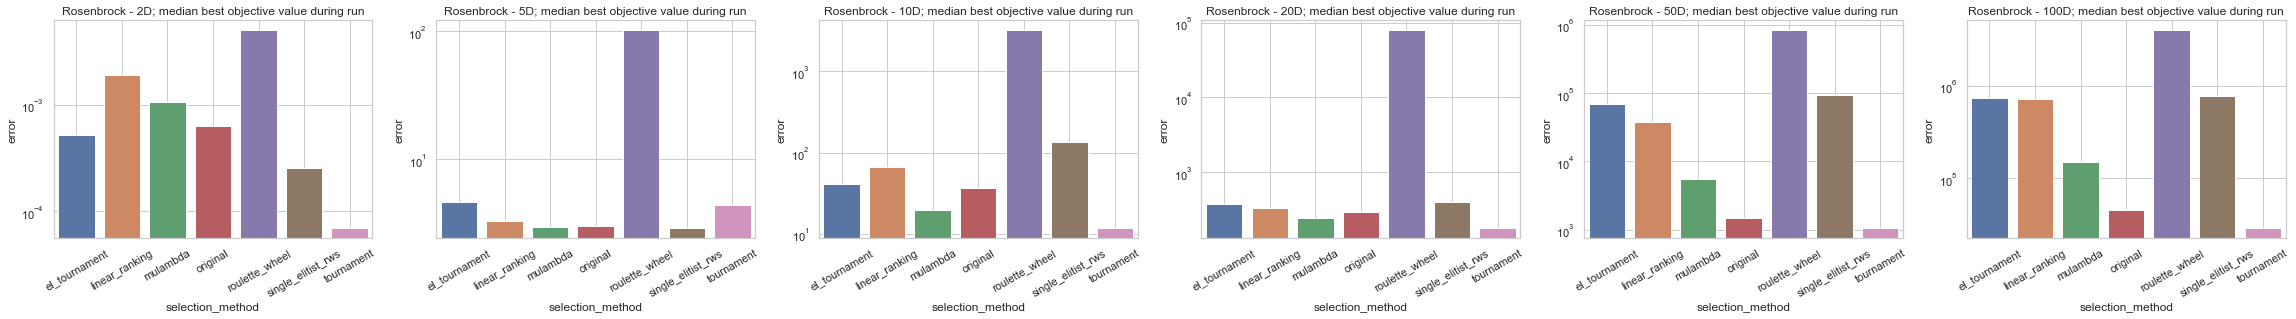

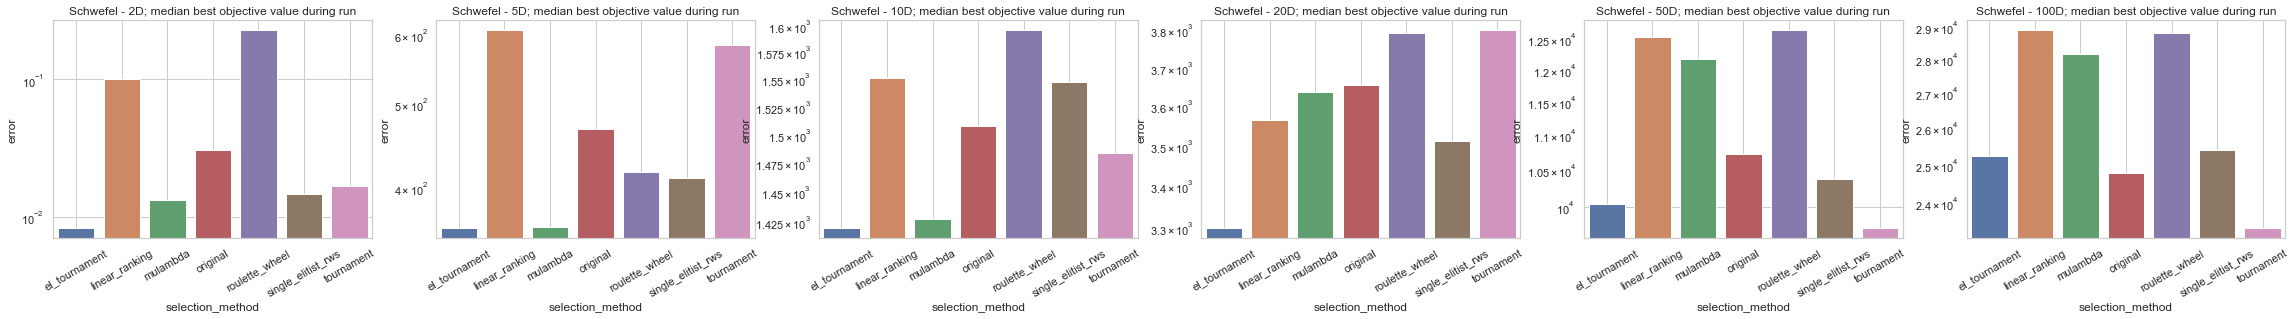

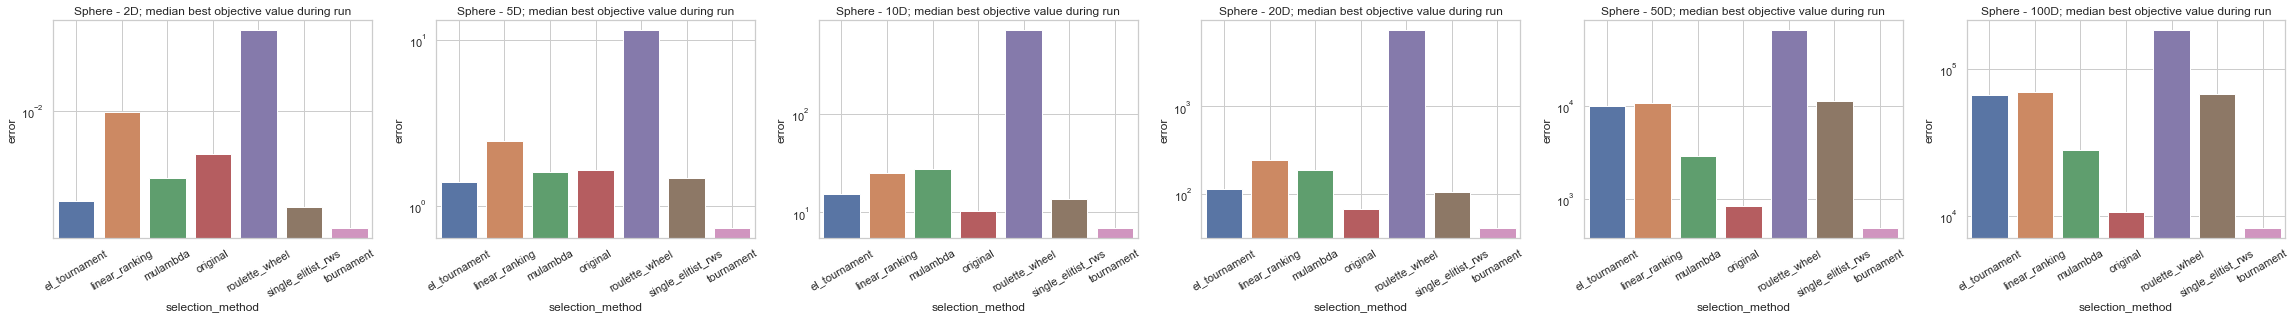

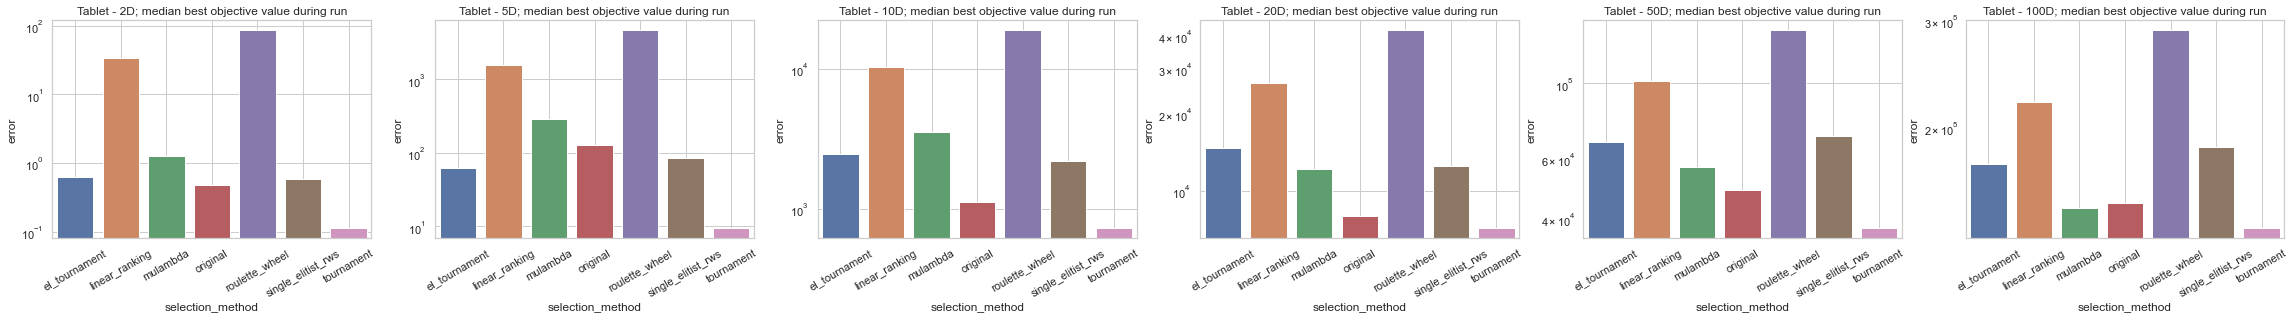

In [144]:
benchmarks = df_nd.benchmark.unique()
i = 0
sns.set_theme(style="whitegrid")
for benchmark in benchmarks:
    data = df_nd[df_nd['benchmark'] == benchmark]
    dimensions = data.dimensions.unique()
    fig, axes =plt.subplots(1,len(dimensions), figsize=(40,4))
    plot_data = data.groupby(['selection_method', 'dimensions']).median().reset_index()[['selection_method','error','dimensions']]
    i = 0
    for dim in dimensions:
        
        ax = sns.barplot(x="selection_method", y="error", data=plot_data[plot_data.dimensions == dim], ax=axes[i])
        ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
        ax.set_title(f'{benchmark} - {dim}D; median best objective value during run')

        ax.set_yscale("log")
        ax.grid()
        ax.yaxis.grid(True)
#     plt.savefig(f'images/{benchmark}.png')
        i+=1
    

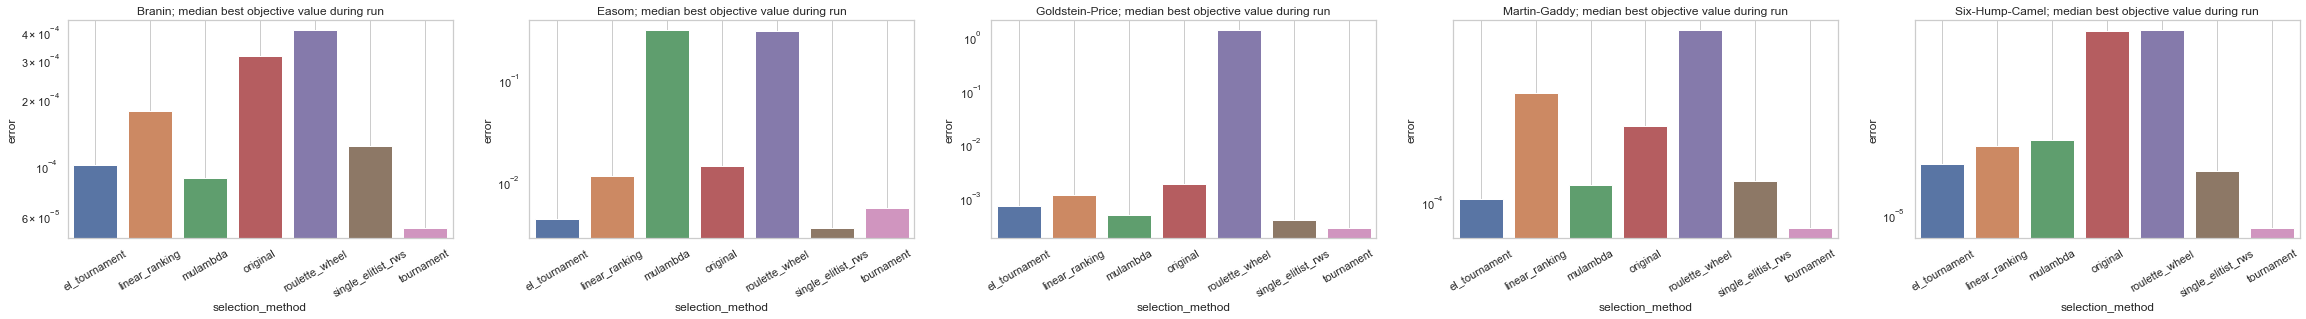

In [145]:
%matplotlib inline

fig, axes =plt.subplots(1,5, figsize=(40,4))
# fig.subplots_adjust(hspace=0.6)

benchmarks = df_2d.benchmark.unique()
i = 0

for benchmark in benchmarks:
    
    plot_data = df_2d[df_2d['benchmark'] == benchmark]
    optimum = plot_data['theoretical_optimum'][:1].item()
    plot_data = plot_data.groupby('selection_method').std().reset_index()[['selection_method','error']]
    
    ax = sns.barplot(x="selection_method", y="error", data=plot_data, ax = axes[i])
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    ax.set_title(f'{benchmark}; median best objective value during run')
    ax.grid()
    ax.set_yscale("log")
    i+=1

In [43]:
try:
    test = pickle.load(open(r"PPA/results/test/mc-test.p", "rb"))
except Exception as e:
    print(e) # 

In [ ]:
test.heritage.relations

In [44]:
import collections
import json

def construct_trees_by_TingYu(edges):
    """Given a list of edges [child, parent], return trees. """
    trees = collections.defaultdict(dict)

    for child, parent in edges:
        trees[parent][child] = trees[child]

    # Find roots
    children, parents = zip(*edges)
    roots = set(parents).difference(children)

    return {root: trees[root] for root in roots}

if __name__ == '__main__':
#     edges = [[0, 6], [17, 5], [2, 7], [4, 14], [12, 9], [15, 5], [11, 1], [14, 8], [16, 6], [5, 1], [10, 7], [6, 10], [8, 2], [13, 1], [1, 12], [7, 1], [3, 2], [19, 12], [18, 19]]
#     edges = [[8,5],[7,5],[4,2],[5,2],[6,3],[2,1],[3,1]]
    edges = test.heritage.relations
    results = json.dumps(construct_trees_by_TingYu(edges), indent=1)
#     print(results)
    with open('PPA/notebooks/test4.json', 'w') as outfile:
        json.dump(results, outfile)

In [129]:
text_file = open("PPA/notebooks/test3.js", "w") 
text_file.write('var example_tree = ' + results)
text_file.close()

In [ ]:
test = [[8,5],[7,5],[4,2],[5,2],[6,3],[2,1],[3,1]]

In [ ]:
Graph.Read_Ncol(test)

In [14]:
test.heritage.relations

[[1, -1],
 [2, -1],
 [3, -1],
 [4, -1],
 [5, -1],
 [6, -1],
 [7, -1],
 [8, -1],
 [9, -1],
 [10, -1],
 [11, -1],
 [12, -1],
 [13, -1],
 [14, -1],
 [15, -1],
 [16, -1],
 [17, -1],
 [18, -1],
 [19, -1],
 [20, -1],
 [21, -1],
 [22, -1],
 [23, -1],
 [24, -1],
 [25, -1],
 [26, -1],
 [27, -1],
 [28, -1],
 [29, -1],
 [30, -1],
 [70, 24],
 [63, 20],
 [31, 1],
 [61, 19],
 [76, 28],
 [50, 14],
 [64, 20],
 [35, 5],
 [62, 20],
 [33, 3],
 [77, 28],
 [75, 28],
 [53, 14],
 [60, 19],
 [65, 20],
 [39, 7],
 [74, 28],
 [48, 12],
 [51, 14],
 [36, 5],
 [66, 21],
 [46, 12],
 [47, 12],
 [38, 7],
 [52, 14],
 [41, 8],
 [55, 16],
 [57, 17],
 [78, 29],
 [42, 8],
 [85, 70],
 [107, 62],
 [88, 63],
 [81, 70],
 [83, 70],
 [87, 63],
 [90, 31],
 [103, 64],
 [89, 63],
 [101, 50],
 [86, 63],
 [84, 70],
 [82, 70],
 [92, 31],
 [91, 31],
 [97, 76],
 [105, 35],
 [99, 76],
 [102, 64],
 [93, 61],
 [100, 50],
 [94, 61],
 [95, 61],
 [104, 64],
 [106, 35],
 [96, 61],
 [108, 33],
 [98, 76],
 [109, 77],
 [111, 75],
 [141, 81],
 [14